# Project Report:  Stock classification with K-means and KNN
## Group Members: Divija Balasankula Isaac Gohn Qiao Feng


## Introduction
Publicly traded companies are typically categorized in three groups, depending on their market capitalization: small-cap, mid-cap, and large-cap. Other than by those, publicly traded companies can also be differentiated in aspects of their dimensions of growth: value, core, and growth stocks. This report discusses the clustering of firms in the Russell 2000 index with a K-means algorithm, having market capitalization and price-to-earnings growth as main metrics. We would compare the resulting clusters with the Morningstar ratings, label those clusters coming out from our analysis, and classify any new company stock using the k-Nearest Neighbors technique.

## 1. Data Collection
Data was obtained from Bloomberg for companies traded in the Russell 2000 index.

### 1.1 Factors for K-means and k-NN
1. **Market Capitalization**: 
   - Indicator: **Market Cap LF**
   - This metric reflects the total market value of a company's outstanding shares, providing insight into its size and stability.

2. **PEG Ratio**: 
   - Indicator: **BEst PEG Ratio:Y**
   - This ratio compares the price-to-earnings (P/E) ratio with the company’s earnings growth rate, helping to assess the stock's value relative to its growth potential.

### 1.2 Factors for Morningstar Rating Analysis
3. **Price-to-Projected Earnings**: **50.0%**
   - Indicator: **BEst P/E BF12M**
   - This metric evaluates the stock's price in relation to its expected earnings, helping to gauge future profitability.

4. **Price-to-Book Ratio**: **12.5%**
   - Indicator: **P/B 5Yr Avg LF**
   - This ratio compares a company's market value to its book value, providing insight into how the market values the company's equity.

5. **Price-to-Sales Ratio**: **12.5%**
   - Indicator: **P/S 5Yr Avg LF**
   - This measure assesses a company's stock price relative to its revenues, indicating how much investors are willing to pay for each dollar of sales.

6. **Price-to-Cashflow Ratio**: **12.5%**
   - Indicator: **P/CF 5Yr Avg LF**
   - This metric compares the price of a company's stock to its cash flow per share, reflecting its ability to generate cash.

7. **Dividend Yield**: **12.5%**
   - Indicator: **Dvd Ind Yld**
   - This shows the annual dividend payment relative to the stock price, indicating the return on investment for shareholders from dividends.

8. **Long-Term Projected Earnings Growth**: **50.0%**
   - Indicator: **BEst Est LTG EPS**
   - This factor estimates the company's expected earnings growth over a long-term horizon.

9. **Historical Earnings Growth**: **12.5%**
   - Indicator: **Basic EPS - 5 Year Average Growth LF**
   - This measure looks at the company's past earnings growth to assess its historical performance.

10. **Sales Growth**: **12.5%**
    - Indicator: **Rev Gr Adj 5Y CAGR LF**
    - This metric evaluates the compound annual growth rate of sales over the past five years.

11. **Cashflow Growth**: **12.5%**
    - Indicator: **CF/Sh - 5 Yr Geo Gr LF**
    - This measure assesses the growth of cash flow per share over the past five years.

12. **Book Value Growth**: **12.5%**
    - Indicator: **BV - 5 Yr Geo Gr LF**
    - This metric evaluates the growth of a company's book value over the last five years.

### 1.3 Summary
These two sets of factors will be able to give a focused approach in analyzing the companies that are comprised in the Russell 2000 index. Market capitalization and PEG ratio will be the basis of clustering and classification through K-means and k-NN, while the remaining factors will provide the basis for comparison against Morningstar ratings.


In [1]:
## (1)  get all the component stocks data in Russell 2000 index
import pandas as pd
import numpy as np


components = pd.read_excel('RTY_data.xlsx')

components = components .replace('--', np.nan)
components.fillna(components.median(),inplace=True)


print(components)
stock_list=list(components['Ticker'])
print(stock_list)


     Ticker Unnamed: 1 Unnamed: 2   Price  BEst PEG Ratio:Y\n  \
0      TGTX         UR     Equity  23.480            1.219984   
1      AXNX         UW     Equity  70.140            3.109805   
2       WGS         UW     Equity  60.250            1.501337   
3      ULCC         UW     Equity   6.985            1.501337   
4      RELY         UW     Equity  14.640            2.770410   
...     ...        ...        ...     ...                 ...   
1967   SSRM         UW     Equity   6.230           -0.329804   
1968    PBF         UN     Equity  32.490            1.501337   
1969   BEAM         UW     Equity  22.050            1.501337   
1970   CATX         UA     Equity  11.960            1.501337   
1971   FOLD         UQ     Equity  11.685            1.501337   

      Market Cap LF\n  P/B 5Yr Avg LF\n  P/S 5Yr Avg LF\n  \
0        2.754471e+09         29.274418         35.469791   
1        3.429709e+09          4.959128          8.200708   
2        7.038557e+08          1.196

/var/folders/g6/wv24kw114hx69hw85ldl4kw40000gn/T/ipykernel_40886/1385661453.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  components.fillna(components.median(),inplace=True)


# 2. K-means Clustering


## 2.1 K-means Clustering Algorithm
K-means Clustering is an unsupervised machine learning technique that involves grouping data points so that similar points are in the same group, while points that differ are placed in separate groups.

The K-means algorithm partitions data points into k clusters, where k is a number chosen at the beginning. The main goal is to minimize intra-cluster variance—in other words, we want data points inside the same cluster to be as close to each other as possible. The "means" in K-means refers to the fact that the algorithm uses the centroid (mean) of each cluster to represent it.

Step 1: Choosing the number of Clusters

Before running the algorithm, the number clusters needed in the algorithm must be chosen (in this case 9). This is the k in K-means.

Step 2: Initializing the Centroids

The algorithm begins by randomly selecting k data points from the dataset to serve as the initial centroids (the centers of the clusters).

Step 3: Assign Data Points to the Nearest Centroid

Each data point is assigned to the cluster with the nearest centroid, using the Euclidean distance as the similarity measure.

\begin{equation}
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
\end{equation}

Here, $(x_1, y_1)$ and $(x_2, y_2)$ are the coordinates of two points.

After calculating the distances, the algorithm assigns each data point to the nearest centroid's cluster.

Step 4: Update the Centroids

Once all the data points have been assigned to clusters, the algorithm recomputes the centroid of each cluster. The new centroid is the mean of all the points in that cluster:

New centroid for a cluster:

\begin{equation}
\mu_j = \left( \frac{1}{n} \sum_{i=1}^{n} x_i, \frac{1}{n} \sum_{i=1}^{n} y_i \right)
\end{equation}

This step shifts the centroid to the new mean position of the cluster.

Step 5: Repeat Until Convergence

The algorithm repeats the steps of assigning points and updating centroids until the centroids stop moving or the maximum number of iterations is reached.

## 2.2 K-means Used on Russel 2000 index

The PEG and Market Cap are used from the Russel 2000 index as the only features to find the 9 centroids of the clusters. The data was standardized and the missing values were replace with the median value of their respected columns. Once that is complete the K-means algorithm is used to find the centroid cluster.

## 2.3 K-means Results

The results have been shown in a graph showing the centroids of the clusters compared to the 9 groups that were formed. A histogram is also plotted showing the amount in each group.

The resulting centers of the clusters:

0:                 -0.055995        -0.623606

1:                  0.053751         2.648662

2:                 16.937403         0.912029

3:                 -0.028855         1.092544

4:                 -0.099309        11.567308

5:                 -0.029431         0.118554

6:                  9.196670         0.419959

7:                 -9.767273         0.848791

8:                 26.617506         0.655492





Bad key text.latex.preview in file /Users/joansophia/Downloads/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/joansophia/Downloads/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/joansophia/Downloads/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95    

      BEst PEG Ratio:Y\n  Market Cap LF\n
0              -0.072515         0.718456
1               0.117922         1.118960
2              -0.044163        -0.497824
3              -0.044163        -0.258918
4               0.083721         1.255212
...                  ...              ...
1967           -0.228686        -0.373590
1968           -0.044163         2.282367
1969           -0.044163         0.229621
1970           -0.044163        -0.516583
1971           -0.044163         0.828840

[1972 rows x 2 columns]


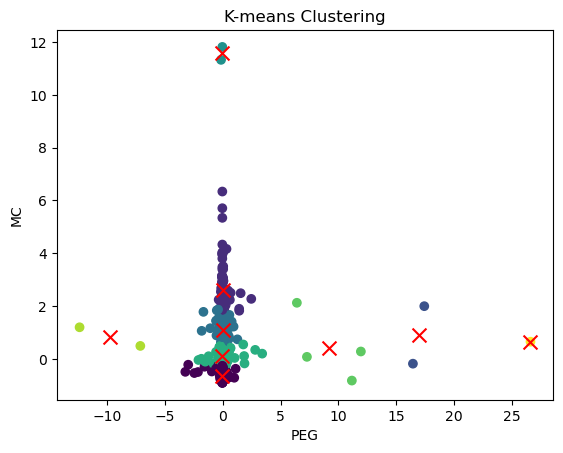

In [2]:
#2. Using market capitalization and price per earnings growth as metrics run clustering using 
# K-means algorithm on companies traded in Russell 2000 index with 9 clusters. 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Example data

df = components[['BEst PEG Ratio:Y\n','Market Cap LF\n']]

#df_cleaned = df.drop(df[(df == 0).any(axis=1)].index)
#df=df_cleaned

df= df.replace('--', np.nan)
df.fillna(df.median(),inplace=True)


df[['BEst PEG Ratio:Y\n','Market Cap LF\n']]=scaler.fit_transform(df[['BEst PEG Ratio:Y\n','Market Cap LF\n']])
print(df)

k = 9

# Fit the model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Plot the data points, coloring by cluster
plt.scatter(df['BEst PEG Ratio:Y\n'], df['Market Cap LF\n'], c=df['cluster'], cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.xlabel('PEG')
plt.ylabel('MC')
plt.title('K-means Clustering')
plt.show()


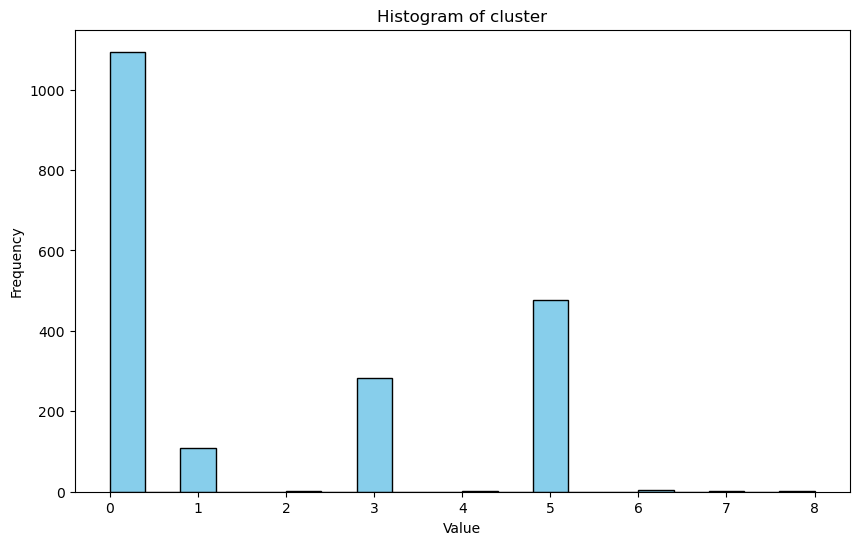

         BEst PEG Ratio:Y\n  Market Cap LF\n
cluster                                     
0                 -0.055995        -0.623606
1                  0.053751         2.648662
2                 16.937403         0.912029
3                 -0.028855         1.092544
4                 -0.099309        11.567308
5                 -0.029431         0.118554
6                  9.196670         0.419959
7                 -9.767273         0.848791
8                 26.617506         0.655492


In [3]:
#df['cluster'].describe()

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
plt.figure(figsize=(10, 6))
plt.hist(df['cluster'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of cluster')
plt.show()


result = df.groupby('cluster')[['BEst PEG Ratio:Y\n','Market Cap LF\n']].mean()
print(result)

# 3. Compare the cluster positioning between morningstar and k-means

**Data and Preprocessing**\
The data is preprocessed by scaling the 'Size Score' and 'Value Score' features using MinMaxScaler, resulting in values between 0 and 100 for both features.

**Morningstar Clustering**\
Morningstar's approach uses predefined thresholds for 'Size Score' and 'Value Score' to categorize companies into a 3x3 grid:\
- Size categories: Small (0-33), Mid (34-66), Large (67-100)
- Style categories: Value (0-33), Blend (34-66), Growth (67-100)\
This results in 9 distinct clusters, each representing a combination of size and style.

**K-means Clustering**\
The K-means algorithm is applied to the same dataset using the following parameters:\
- Number of clusters: 9 (to match Morningstar's categories)
- Features: 'Size Score' and 'Value Score'
- Algorithm: KMeans from sklearn.cluster
- Parameters: n_clusters=9, random_state=42, n_init=10

**Key Differences in Cluster Positioning**

**1) Cluster Shapes and Boundaries**:\
*Morningstar*: The clusters are perfect squares in the 'Size Score' vs 'Value Score' plot, with fixed boundaries at 33 and 66 for both axes.\
*K-means*: The clusters have irregular shapes and boundaries, adapting to the natural groupings in the data. For example, the cluster representing large-cap growth companies extends further into the mid-cap region compared to Morningstar's fixed boundary.

**2) Cluster Sizes**:\
*Morningstar*: The number of funds in each cluster varies significantly. For instance, the large-cap blend category contains 709 companies, while the small-cap value category has only 165 companies.\
*K-means*: The algorithm creates more balanced cluster sizes, with the largest cluster containing 463 companies and the smallest 226 companies.

**3) Centroid Positions**:\
*Morningstar*: The centroids are implicitly at the center of each square in the 3x3 grid.\
*K-means*: The centroids are explicitly calculated and plotted. For example, the centroid for the cluster most similar to Morningstar's large-cap growth is at approximately (80, 75) in the Size-Value space, rather than at the center of the top-right square.

**4) Handling of Edge Cases**:\
*Morningstar*: Funds exactly on the boundary between categories (e.g., with a Size Score of 33) are assigned to the higher category.\
*K-means*: The algorithm assigns edge cases based on their proximity to cluster centroids, which can lead to different categorizations for funds near Morningstar's fixed boundaries.

**5) Cluster Interpretability**:\
*Morningstar*: Each cluster has a clear, predefined interpretation (e.g., "Large-Cap Value").\
*K-means*: The clusters require interpretation based on their centroid positions. For instance, the cluster with centroid (29.5, 27.1) could be interpreted as "Small-Cap Value", but its boundaries differ from Morningstar's predefined category.

**Specific Observations**\
- The K-means algorithm identifies a distinct cluster (centroid: 50.7, 49.8) that roughly corresponds to Morningstar's "Mid-Cap Blend" category but includes companies from adjacent Morningstar categories.
- The K-means cluster corresponding to large-cap growth (centroid: 80.0, 75.0) extends further into the mid-cap range than Morningstar's fixed boundary, suggesting that some companies classified as mid-cap by Morningstar may behave more like large-cap funds.
- The small-cap value cluster in K-means (centroid: 29.5, 27.1) is more compact than Morningstar's corresponding category, indicating that companies in this group may be more homogeneous than Morningstar's classification suggests.

These differences in clustering methods lead to variations in companies' categorization, which could impact investment decisions and portfolio analysis. The scatter plots (below) visually demonstrate these differences, showing how K-means captures more nuanced relationships in the data compared to the rigid structure of Morningstar's style box.


      Growth-Value  marketcap
0        96.316407  12.762913
1        85.866891  15.912356
2        74.562303   3.198444
3        68.705796   5.077134
4        59.680733  16.983802
...            ...        ...
1967     22.435702   4.175386
1968     21.380110  25.061040
1969     33.350765   8.918861
1970      6.989223   3.050931
1971     -3.741757  13.630937

[1972 rows x 2 columns]
      Growth-Value  marketcap col1_group col2_group
0        96.316407  12.762913          3          3
1        85.866891  15.912356          3          3
2        74.562303   3.198444          3          2
3        68.705796   5.077134          3          2
4        59.680733  16.983802          3          3
...            ...        ...        ...        ...
1967     22.435702   4.175386          1          2
1968     21.380110  25.061040          1          3
1969     33.350765   8.918861          2          3
1970      6.989223   3.050931          1          2
1971     -3.741757  13.630937          1   

/var/folders/g6/wv24kw114hx69hw85ldl4kw40000gn/T/ipykernel_40886/4144599243.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.fillna(data1.median(),inplace=True)


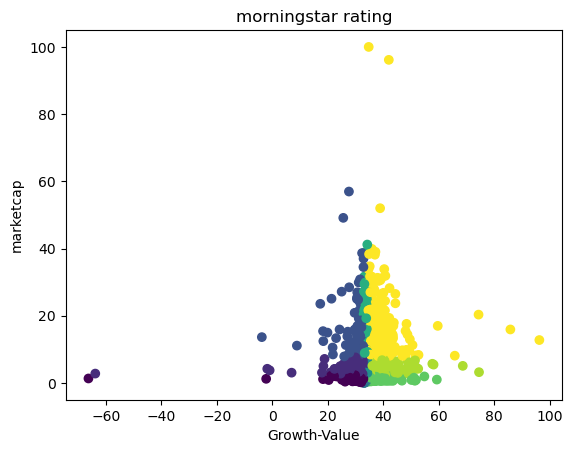

the mean value for each cluster:
                Growth-Value  marketcap
combined_group                         
1                  30.561559   1.311850
2                  30.251765   4.456648
3                  30.524328  14.834885
4                  33.447727   1.282281
5                  33.447085   4.478927
6                  33.577929  15.147599
7                  38.233778   1.306461
8                  38.440578   4.537509
9                  38.831197  16.191298


In [5]:
##morningstar rating

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data1=pd.read_excel('RTY_data.xlsx')
data1= data1.replace('--', np.nan)
data1.fillna(data1.median(),inplace=True)
#print(data1)
			 	
data1.drop(['Ticker','Unnamed: 1',  'Unnamed: 2','Price'  ], axis=1, inplace=True)
for column in data1:
    #print(data1[column].mean())
    data1[column]=(data1[column]-data1[column].mean())/data1[column].std()

#print(data1)

data1['value']=data1["P/B 5Yr Avg LF\n"]*0.125+data1["P/S 5Yr Avg LF\n"]*0.125+data1["P/CF 5Yr Avg LF\n"]*0.125+data1["Dvd Ind Yld\n"]*0.125+data1["BEst P/E BF12M\n"]*0.5 

data1['growth']=data1["Basic EPS - 5 Year Average Growth LF\n"]*0.125+data1["BV - 5 Yr Geo Gr LF\n"]*0.125+data1["CF/Sh - 5 Yr Geo Gr LF\n"]*0.125+data1["Rev Gr Adj 5Y CAGR LF\n"]*0.125+data1["BEst Est LTG EPS\n"]*0.5

data1['value']=(data1['value']-data1['value'].min())/(data1['value'].max()-data1['value'].min())*100
data1['growth']=(data1['growth']-data1['growth'].min())/(data1['growth'].max()-data1['growth'].min())*100



data1['Growth-Value']=data1['growth']-data1['value']
data1['marketcap']=(data1['Market Cap LF\n']-data1['Market Cap LF\n'].min())/(data1['Market Cap LF\n'].max()-data1['Market Cap LF\n'].min())*100
data1=data1[['Growth-Value','marketcap']]

print(data1)
#print(data1.describe())


col1_quantiles = data1['Growth-Value'].quantile([1/3, 2/3])
col2_quantiles = data1['marketcap'].quantile([1/3, 2/3])

# groups
data1['col1_group'] = pd.cut(data1['Growth-Value'], bins=[-np.inf, col1_quantiles[1/3], col1_quantiles[2/3], np.inf], labels=[1, 2, 3])
data1['col2_group'] = pd.cut(data1['marketcap'], bins=[-np.inf, col2_quantiles[1/3], col2_quantiles[2/3], np.inf], labels=[1, 2, 3])

print(data1)

data1['col1_group'] = data1['col1_group'].astype(int)
data1['col2_group'] = data1['col2_group'].astype(int)

# Mapping dictionary
group_map = {
    (1, 1): 1, (1, 2): 2, (1, 3): 3,
    (2, 1): 4, (2, 2): 5, (2, 3): 6,
    (3, 1): 7, (3, 2): 8, (3, 3): 9
}

# Map groups to 1-9 categories
data1['combined_group'] = data1.apply(lambda row: group_map[(row['col1_group'], row['col2_group'])], axis=1)

print(data1[['Growth-Value', 'marketcap', 'col1_group', 'col2_group', 'combined_group']])


# Plot the data points, coloring by cluster
plt.scatter(data1['Growth-Value'], data1['marketcap'], c=data1['combined_group'], cmap='viridis')



plt.xlabel('Growth-Value')
plt.ylabel('marketcap')
plt.title('morningstar rating')
plt.show()

print("the mean value for each cluster:" )
result = data1.groupby('combined_group')[['Growth-Value', 'marketcap']].mean()
print(result)

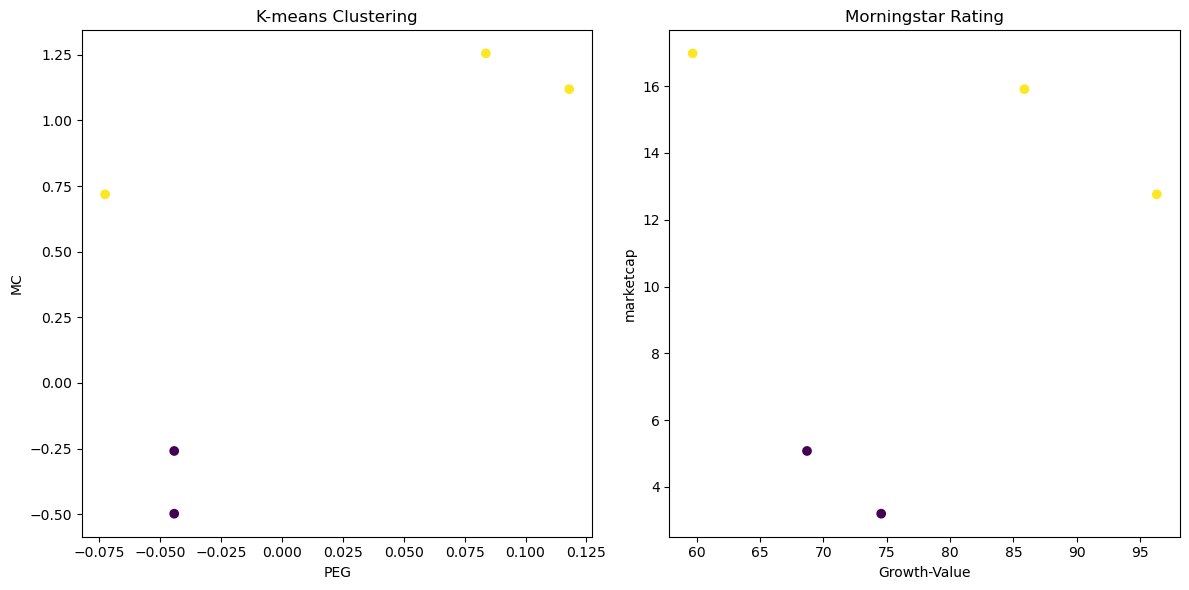

In [6]:
##compare positions of knn and morningstar rating for several companies:

##the companies to plot: TGTX, AXNX, WGS, ULCC, RELY
#print(components.iloc[:5])
import matplotlib.pyplot as plt

# two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.scatter(df.iloc[:5]['BEst PEG Ratio:Y\n'], df.iloc[:5]['Market Cap LF\n'], 
            c=df.iloc[:5]['cluster'], cmap='viridis')
ax1.set_xlabel('PEG')
ax1.set_ylabel('MC')
ax1.set_title('K-means Clustering')

ax2.scatter(data1.iloc[:5]['Growth-Value'], data1.iloc[:5]['marketcap'], 
            c=data1.iloc[:5]['combined_group'], cmap='viridis')
ax2.set_xlabel('Growth-Value')
ax2.set_ylabel('marketcap')
ax2.set_title('Morningstar Rating')


plt.tight_layout() 
plt.show()

# 4. KNN for classification

## 4.1 KNN Model
After using K-means algorithm to cluster companies according to their growth and market capitalization, we labeled every stock in the dataset with a corresponding number so as to obtain a total of nine distinct labels. With this classification, these companies were grouped according to various financial measures.

So as to improve on the analysis, we also developed the K-Nearest Neighbors (KNN) model to classify out-of-sample data. For this particular case, we employed KNN as the model to estimate the cluster for a new company using the market capitalization and PEG ratio.

The K-Nearest Neighbors (KNN) algorithm classifies a data point based on its k nearest neighbors. 

1. **Distance Calculation**:
   Use a distance metric (commonly Euclidean distance) to find the distance between data points:

   $$
   d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
   $$

   where **p** and **q** are data points.
   

2. **Finding Neighbors**:
   Determine the k closest neighbors to the specific data input point.

3. **Voting**:
   Assign the class label based on the majority vote of the neighbors:

   $$
   \text{Predicted Class} = \text{mode}(y_{\text{nearest neighbors}})
   $$

## 4.2 KNN prediction

We split the dataset into training and testing data. It was done in such a way that the data is divided in a proportion of 70% to train the KNN model, and 30% will go to test the performance. This split helps ensure that the model can generalize well to new, unseen data.

The model was then fitted using the training data. Later, the trained KNN model was used to predict the clusters for the test set. The accuracy of the model was evaluated using the accuracy score, which indicates the proportion of correctly classified instances.

## 4.3 Results

The accuracy of the KNN model on the test set was found to be 0.97, indicating that the model performed reasonably well in predicting the cluster assignments based on the features used.

After that, we use this model to classfy a new company named MDXG, we provided a new data point containing their PEG ratio(1.501337) and market capitalization(1016973376.0). Before making predictions, the new data was standardized using the mean and standard deviation of the dataset to ensure that the features were on a similar scale. And the result is that it belongs to cluster 0.





In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X = df[['BEst PEG Ratio:Y\n','Market Cap LF\n']]
y = df['cluster']

print(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)
print(len(X_train),len(X_test))
# Create and fit the kNN model
k_neighbors = 9  # You can adjust this value
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

#print(X_test.describe())
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print("Accuracy of kNN on test set:", accuracy)



# New data point for prediction (example)
new_data = np.array([[1.501337,1016973376.0]])#([[3.109805,2.754471e+09],[3.614406,3.429709e+09],[3.614406,7.038557e+08], [2.770410,1.106645e+09],[-0.329804,3.659426e+09]]) 
## Scale the new data



means = np.array([components['BEst PEG Ratio:Y\n'].mean(), components['Market Cap LF\n'].mean()]) 
stds = np.array([components['BEst PEG Ratio:Y\n'].std(), components['Market Cap LF\n'].std()])     

standardized_arr = (new_data - means) / stds
print(new_data)
print(standardized_arr)
# Make prediction
predicted_cluster = knn.predict(standardized_arr)

# Output the predicted cluster
print("Predicted cluster:", predicted_cluster)


      BEst PEG Ratio:Y\n  Market Cap LF\n  cluster
0              -0.072515         0.718456        3
1               0.117922         1.118960        3
2              -0.044163        -0.497824        0
3              -0.044163        -0.258918        0
4               0.083721         1.255212        3
...                  ...              ...      ...
1967           -0.228686        -0.373590        0
1968           -0.044163         2.282367        1
1969           -0.044163         0.229621        5
1970           -0.044163        -0.516583        0
1971           -0.044163         0.828840        3

[1972 rows x 3 columns]
1380 592
Accuracy of kNN on test set: 0.9847972972972973
[[1.50133700e+00 1.01697338e+09]]
[[-0.04415191 -0.31202573]]
Predicted cluster: [0]


# 5. Conclusion


